# A Component-Based Analysis of Data Stories Involving Semantic Web Data and Tools

This notebook presents a component-based analysis of data stories created with Semantic Web technologies by university students with entry-level proficiency in both information visualisation and SPARQL. 

The stories were authored using [Melody](https://projects.dharc.unibo.it/melody/), a storytelling platform that integrates Semantic Web technologies and supports narrative construction from structured data.

The dataset used in this analysis is available on [Zenodo](https://doi.org/10.5281/zenodo.14499992). Through descriptive statistics and visual summaries, this notebook examines how beginner users structure narratives using textual elements, visualisation types, and SPARQL queries — contributing to a better understanding of data literacy development in educational settings grounded in Semantic Web approaches.

In [1]:
import os
import json
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns
from collections import defaultdict, Counter

color_palette = ['#5565cf', '#b14ecf', '#cf4773', '#cf913f', '#87cf38', '#30cf6b', '#29a1cf', '#2138cf']

data_stories_summary_file = 'data_stories_summary.json'

plt.rcParams['font.family'] = 'DejaVu Sans'


### Element Usage Analysis

In [2]:
file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)

elements_list = []
viz_types_list = []
element_story_count = defaultdict(int)
viz_story_count = defaultdict(int)

# Loop through each story and count unique elements per story
for story_id, story_data in data.items():
    elements = set(story_data.get("elements", []))
    data_viz = set(story_data.get("viz_types", []))
    for element in elements:
        element_story_count[element] += 1
    for viz in data_viz:
        viz_story_count[viz] += 1

for story_id, story_data in data.items():
    # elements = story_data.get("elements", [])
    elements_list.extend(story_data.get("elements", []))
    viz_types_list.extend(story_data.get("viz_types", []))

# Count frequency of each element and chart type
element_counts = Counter(elements_list)
chart_type_counts = Counter(viz_types_list)

elements_df = pd.DataFrame(element_counts.items(), columns=["Element", "Count"])
elements_df["Story Count"] = elements_df["Element"].map(element_story_count)
elements_df = elements_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

viz_types_df = pd.DataFrame(chart_type_counts.items(), columns=["Data Viz Type", "Count"])
viz_types_df["Story Count"] = viz_types_df["Data Viz Type"].map(viz_story_count)
viz_types_df = viz_types_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

print(f'Total Number of Data Stories: {len(data)}')
print("Element Usage Frequency:")
print(elements_df)

print("\nChart Type Usage Frequency:")
print(viz_types_df)

Total Number of Data Stories: 51
Element Usage Frequency:
      Element  Count  Story Count
0    data viz    329           50
1        text    244           48
2       count    106           48
3  textsearch     29           29

Chart Type Usage Frequency:
   Data Viz Type  Count  Story Count
0          table    173           46
1  doughnutchart     52           45
2            map     44           33
3       barchart     36           32
4      linechart     23           20
5    scatterplot      1            1


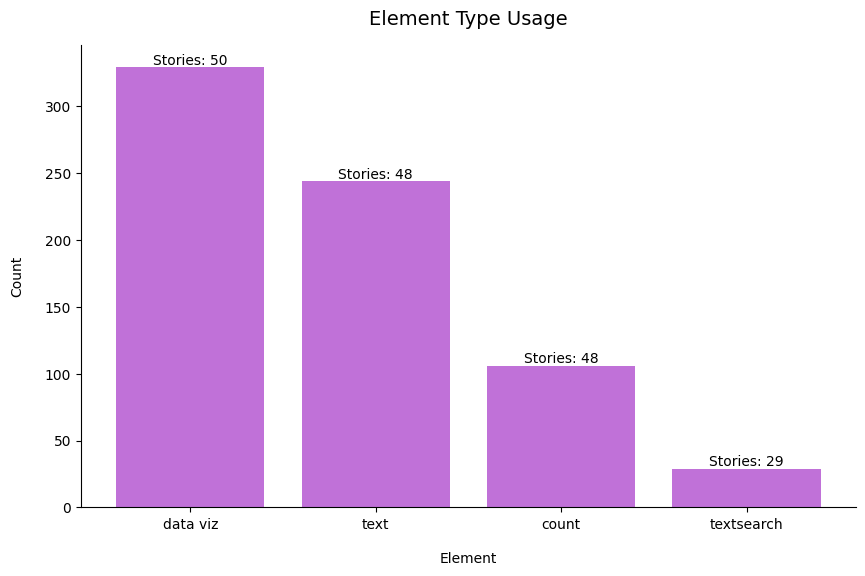

In [3]:
# Plot element usage
plt.figure(figsize=(10, 6))
bars = plt.bar(elements_df['Element'], elements_df['Count'], color=color_palette[1], alpha=0.8)
plt.title('Element Type Usage', fontsize=14, pad=15)
plt.xlabel('Element', labelpad=15)
plt.ylabel('Count', labelpad=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for bar, story_count in zip(bars, elements_df["Story Count"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'Stories: {story_count}', ha='center', va='bottom')
plt.show()

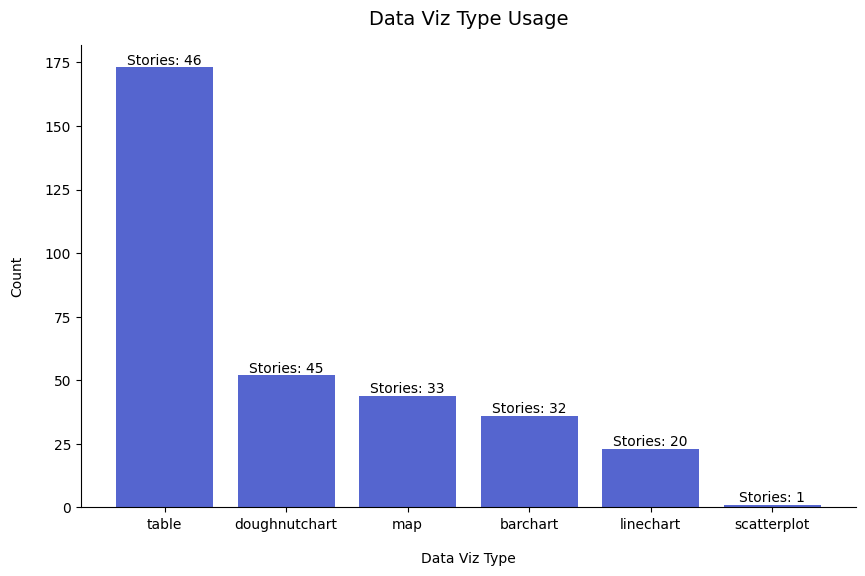

In [4]:
# Plot chart type usage
plt.figure(figsize=(10, 6))
viz_bars = plt.bar(viz_types_df['Data Viz Type'], viz_types_df['Count'], color=color_palette[0])
plt.title('Data Viz Type Usage', fontsize=14, pad=15)
plt.xlabel('Data Viz Type', labelpad=15)
plt.ylabel('Count', labelpad=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for bar, story_count in zip(viz_bars, viz_types_df["Story Count"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'Stories: {story_count}', ha='center', va='bottom')
plt.show()

In [5]:
# Calculate the number of elements per story
elements_per_story = []
for story_id, story_data in data.items():
    num_elements = len(story_data.get("elements", []))
    elements_per_story.append(num_elements)

# Calculate total number of elements (including duplicates across stories)
total_elements = sum(elements_per_story)

# Print summary statistics
print("\nElements per Story Statistics:")
print(f"Total number of elements (across all stories): {total_elements}")
print(f"Min: {min(elements_per_story)}")
print(f"Max: {max(elements_per_story)}")
print(f"Mean: {np.mean(elements_per_story):.2f}")
print(f"Median: {np.median(elements_per_story)}")


Elements per Story Statistics:
Total number of elements (across all stories): 708
Min: 4
Max: 31
Mean: 13.88
Median: 13.0


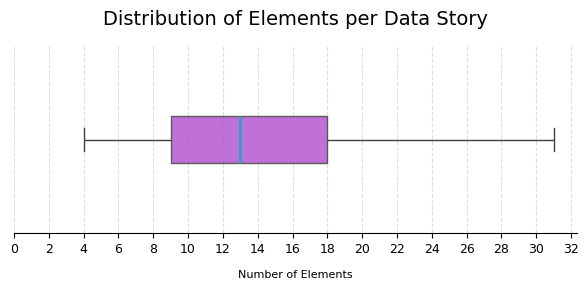

In [6]:
plt.figure(figsize=(6, 3))
sns.boxplot(
    x=elements_per_story,
    orient='h',
    width=0.25,
    boxprops=dict(facecolor=color_palette[1], alpha=0.8),
    medianprops=dict(color=color_palette[6], linewidth=2)
)

plt.title('Distribution of Elements per Data Story', fontsize=14, pad=15)
plt.xlabel('Number of Elements', labelpad=10, fontsize=8)
plt.yticks([])

max_val = max(elements_per_story)
plt.xticks(range(0, max_val + 2, 2), fontsize=9)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [7]:
# Collect per-story counts for each element
element_story_values = []

for story_id, story_data in data.items():
    element_counts = Counter(story_data.get("elements", []))  # count elements in this story
    for element, count in element_counts.items():
        element_story_values.append({
            "Element": element,
            "Count": count
        })

# Create long-form DataFrame
element_box_df = pd.DataFrame(element_story_values)

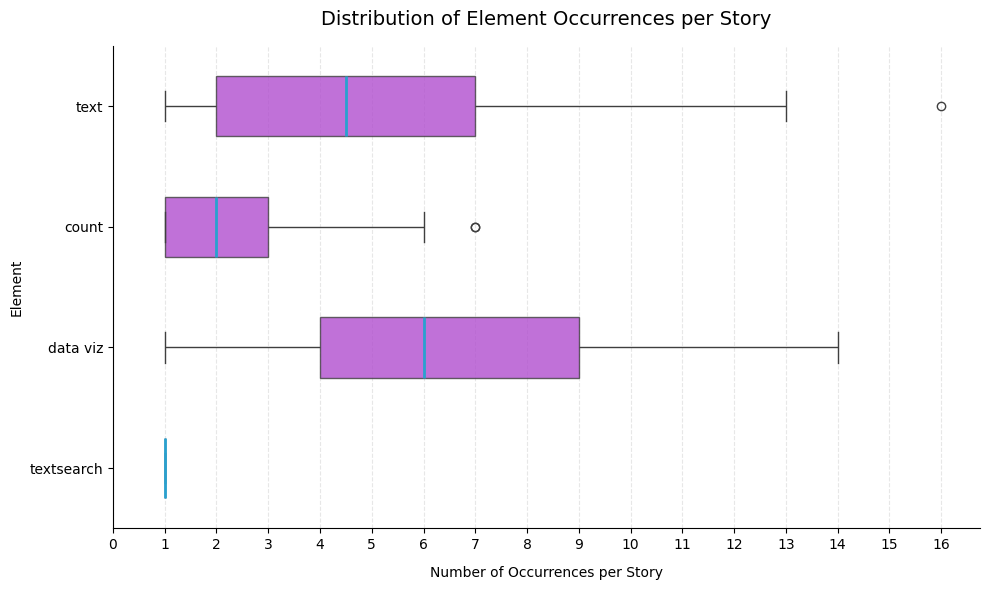

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=element_box_df, x="Count", y="Element", patch_artist=True,width=0.5, boxprops=dict(facecolor=color_palette[1], alpha=0.8), medianprops=dict(color=color_palette[6], linewidth=2))

plt.title("Distribution of Element Occurrences per Story", fontsize=14, pad=15)
plt.xlabel("Number of Occurrences per Story", labelpad=10)
plt.ylabel("Element")
# Set x-ticks from 0 to max count (or adjust step)
xticks = range(0, element_box_df["Count"].max() + 1)
plt.xticks(xticks)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
element_story_values = []

for story_id, story_data in data.items():
    raw_elements = story_data.get("elements", [])
    viz_types = story_data.get("viz_types", [])

    processed_elements = []
    viz_added = False  # track if we've already added viz_types

    for el in raw_elements:
        if el == "data viz" and not viz_added:
            processed_elements.extend(viz_types)
            viz_added = True
        elif el != "data viz":
            processed_elements.append(el)

    # Count how many times each element appears in this story
    element_counts = Counter(processed_elements)

    # Build long-form list for DataFrame
    for element, count in element_counts.items():
        element_story_values.append({
            "Element": element,
            "Count": count
        })


element_box_df = pd.DataFrame(element_story_values)


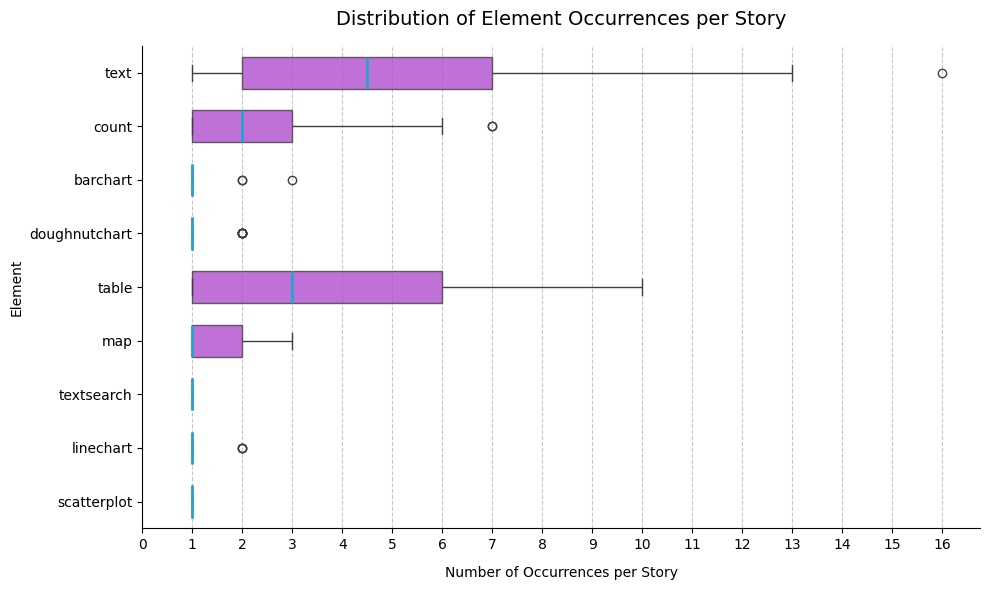

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=element_box_df, x="Count", y="Element", patch_artist=True,width=0.6, boxprops=dict(facecolor=color_palette[1], alpha=0.8), medianprops=dict(color=color_palette[6], linewidth=2))

plt.title("Distribution of Element Occurrences per Story", fontsize=14, pad=15)
plt.xlabel("Number of Occurrences per Story", labelpad=10)
plt.ylabel("Element")


xticks = range(0, element_box_df["Count"].max() + 1)
plt.xticks(xticks)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

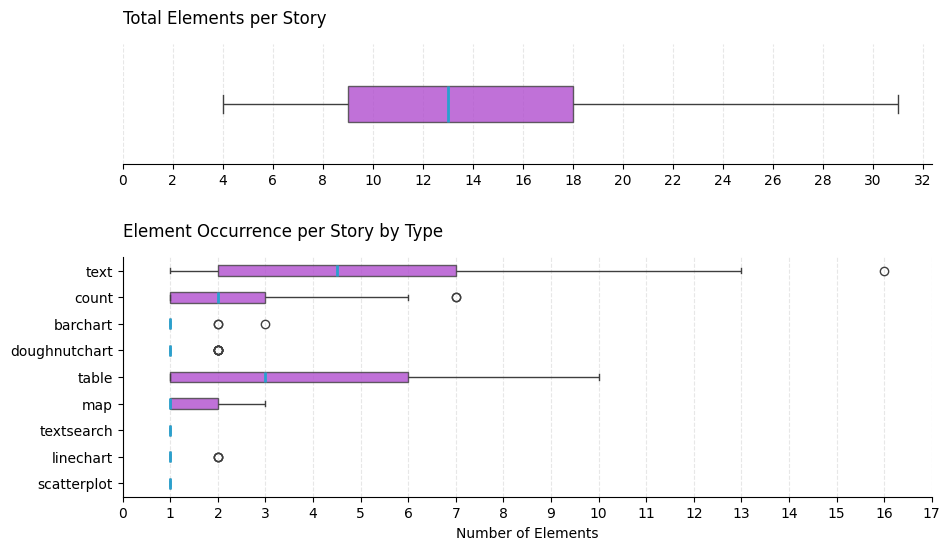

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), height_ratios=[1, 2], sharex=False)

# Top Plot: Total Elements per Story
sns.boxplot(
    x=elements_per_story,
    ax=axes[0],
    orient='h',
    width=0.3,
    boxprops=dict(facecolor=color_palette[1], alpha=0.8),
    medianprops=dict(color=color_palette[6], linewidth=2)
)
axes[0].set_title('Total Elements per Story', fontsize=12, pad=15, loc='left')
axes[0].set_xlabel('')
axes[0].set_yticks([])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].grid(axis='x', linestyle='--', alpha=0.3)
max_val_top = max(elements_per_story)
axes[0].set_xticks(range(0, max_val_top + 2, 2))

# Bottom Plot: Element Occurrence per Story by Type
sns.boxplot(
    data=element_box_df,
    x='Count',
    y='Element',
    ax=axes[1],
    width=0.4,
    boxprops=dict(facecolor=color_palette[1], alpha=0.8),
    medianprops=dict(color=color_palette[6], linewidth=2)
)
axes[1].set_title('Element Occurrence per Story by Type', fontsize=12, pad=15, loc='left')
axes[1].set_xlabel('Number of Elements', fontsize=10)
axes[1].set_ylabel('')  # 👈 remove y-axis label
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].grid(axis='x', linestyle='--', alpha=0.3)
max_val_bottom = element_box_df["Count"].max()
axes[1].set_xticks(range(0, max_val_bottom + 2, 1))

plt.tight_layout(pad=2.5)
plt.show()


### Variety of elements in the same story

In [12]:
file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)

story_elements = {}

for story_id, story_data in data.items():
    story_elements[story_id] = story_data['elements_order']

df = pd.DataFrame()

for story, elements in story_elements.items():
    # Create a temporary df for the current story
    temp_df = pd.DataFrame.from_dict(elements, orient='index', columns=[story])
    
    # Transpose to have the order as columns and the story as rows
    temp_df = temp_df.T
    df = pd.concat([df, temp_df], sort=False)

print(df)

                 1           2         3           4           5           6  \
D-hp3wDV      text       count     count    data viz    data viz    data viz   
y4Srva15      text       count  data viz    data viz    data viz    data viz   
7qpfziir      text        text     count       count       count        text   
Nokx0yU6      text  textsearch  data viz    data viz         NaN         NaN   
gz_gxhYn      text       count     count       count        text    data viz   
U2OtB3XT      text        text     count        text       count        text   
v4h_GSI0      text       count  data viz    data viz        text    data viz   
1ptR3pru      text       count     count    data viz    data viz    data viz   
JQpdcw-d      text        text     count       count    data viz    data viz   
B9SLlUry      text       count     count    data viz    data viz    data viz   
r7i-PG2n      text        text     count       count        text    data viz   
AUmcnOzL      text       count      text

C:\Users\giuli\AppData\Local\Temp\ipykernel_29868\1288690900.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  index_mapped_df = df.applymap(lambda x: label_to_index.get(x) if pd.notna(x) else np.nan)


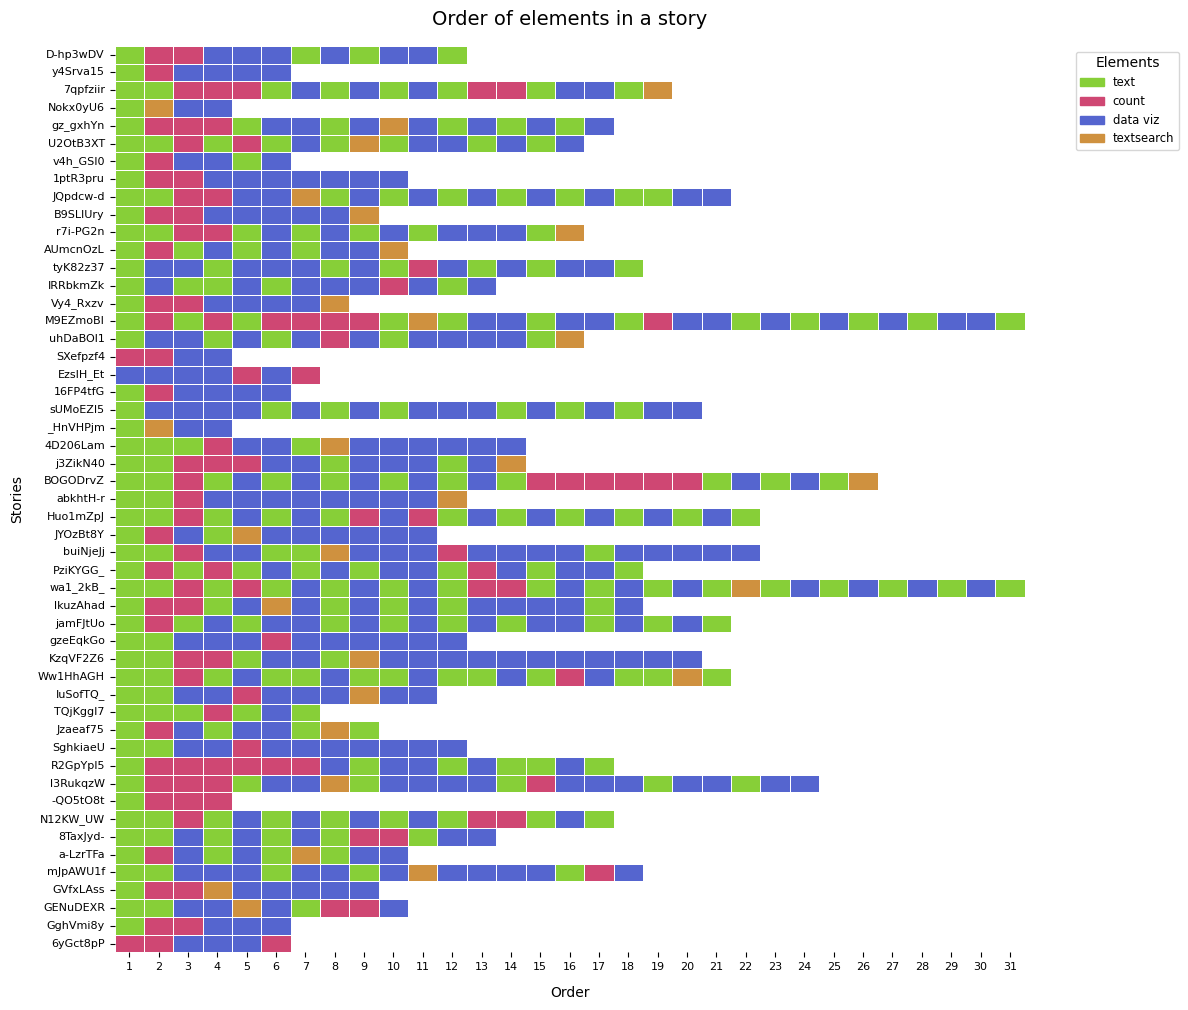

In [15]:
# Get unique elements for the legend
unique_labels = pd.unique(df.values.ravel('K'))
unique_labels = [label for label in unique_labels if pd.notna(label)]

# Create a mapping from labels to indices
label_to_index = {label: i for i, label in enumerate(unique_labels)}

# Map the df values to indices, ignoring NaNs
index_mapped_df = df.applymap(lambda x: label_to_index.get(x) if pd.notna(x) else np.nan)

# Dynamically set figure size based on the number of rows (stories)
num_stories = index_mapped_df.shape[0]
fig_width = 12 
fig_height = max(8, num_stories * 0.2)

# Create the color map
cmap = sns.color_palette([color_palette[4], color_palette[2], color_palette[0], color_palette[3]], len(unique_labels))
norm = mcolors.BoundaryNorm(boundaries=np.arange(len(unique_labels)+1)-0.5, ncolors=len(unique_labels))

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(index_mapped_df, cmap=mcolors.ListedColormap(cmap), norm=norm, linewidths=.5, cbar=False, mask=index_mapped_df.isna())

handles = [plt.Rectangle((0, 0), 1, 1, color=cmap[i]) for i in range(len(unique_labels))]
plt.legend(handles, unique_labels, title="Elements", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.title('Order of elements in a story', fontsize=14, pad=15)
plt.xlabel('Order', fontsize=10, labelpad=10)
plt.ylabel('Stories', fontsize=10, labelpad=10)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
# text search

with open(data_stories_summary_file, 'r') as f:
    data_stories_summary = json.load(f)

textsearch_labels = []
actions_per_textsearch = []
textsearches_per_story = []

for story_id, story_data in data_stories_summary.items():
    textsearch_count = 0  # Count textsearches in each data story
    for idx, textsearch in enumerate(story_data.get('queries', [])):
        if textsearch['type'] == 'textsearch':
            textsearch_count += 1
            textsearch_labels.append(f"{story_id}_{idx}")
            actions = textsearch.get('actions', {})
            num_actions = sum(len(action_list) for action_list in actions.values())
            actions_per_textsearch.append(num_actions)
    
    textsearches_per_story.append(textsearch_count)

# Calculate statistics for textsearches per data story
max_textsearches = max(textsearches_per_story)
min_textsearches = min(textsearches_per_story)
avg_textsearches = np.mean(textsearches_per_story)

# Calculate statistics for actions per textsearch
max_actions = max(actions_per_textsearch)
min_actions = min(actions_per_textsearch)
avg_actions = np.mean(actions_per_textsearch)

# Print statistics
print(f"Textsearches per Data Story: Max = {max_textsearches}, Min = {min_textsearches}, Avg = {avg_textsearches:.2f}")
print(f"Actions per Textsearch: Max = {max_actions}, Min = {min_actions}, Avg = {avg_actions:.2f}")

sorted_data = sorted(zip(actions_per_textsearch, textsearch_labels), reverse=True)
sorted_actions_per_textsearch, sorted_textsearch_labels = zip(*sorted_data)

# Calculate percentiles
p25 = np.percentile(sorted_actions_per_textsearch, 25)
p50 = np.percentile(sorted_actions_per_textsearch, 50)
p75 = np.percentile(sorted_actions_per_textsearch, 75)

Textsearches per Data Story: Max = 1, Min = 0, Avg = 0.57
Actions per Textsearch: Max = 11, Min = 0, Avg = 2.14


### Text Length

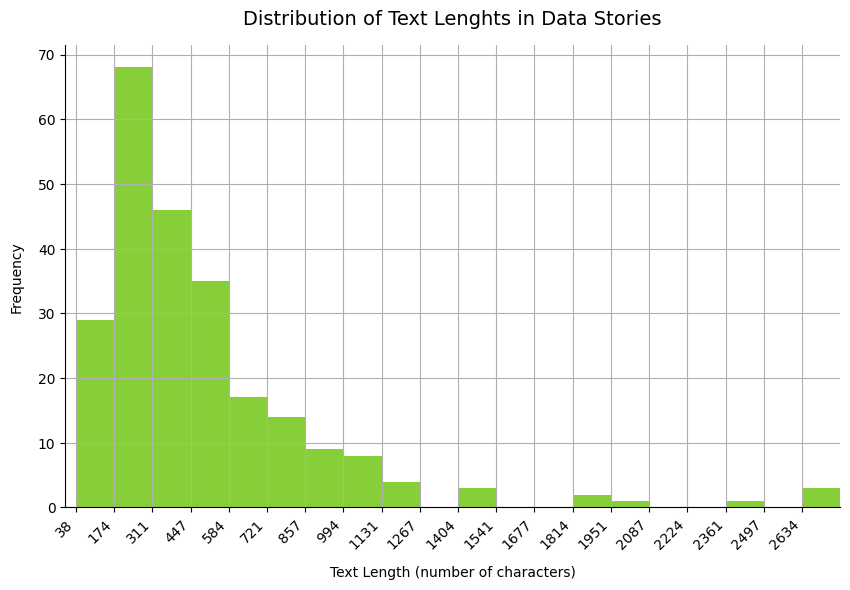

In [16]:
# Extracting text elements and calculating their lengths

file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)

text_lengths = []

for story_id, story_data in data.items():
    texts = story_data.get('texts', [])
    for text in texts:
        if len(text) > 0:
            text_lengths.append(len(text))

min_length = min(text_lengths)
max_length = max(text_lengths)

num_bins = 20

bin_edges = np.linspace(min_length, max_length, num_bins + 1)

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    text_lengths, 
    bins=num_bins, 
    range=(min_length, max_length), 
    color=color_palette[4]
)

bin_labels = [f'{int(bins[i])}' for i in range(len(bins)-1)]
plt.xticks(ticks=bins[:-1], labels=bin_labels, rotation=45, ha='right')
plt.xlim(0, bins[-1])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Distribution of Text Lenghts in Data Stories', fontsize=14, pad=15)
plt.xlabel('Text Length (number of characters)', labelpad=10)
plt.ylabel('Frequency', labelpad=10)
plt.grid(True)

Number of stories with closing text: 12


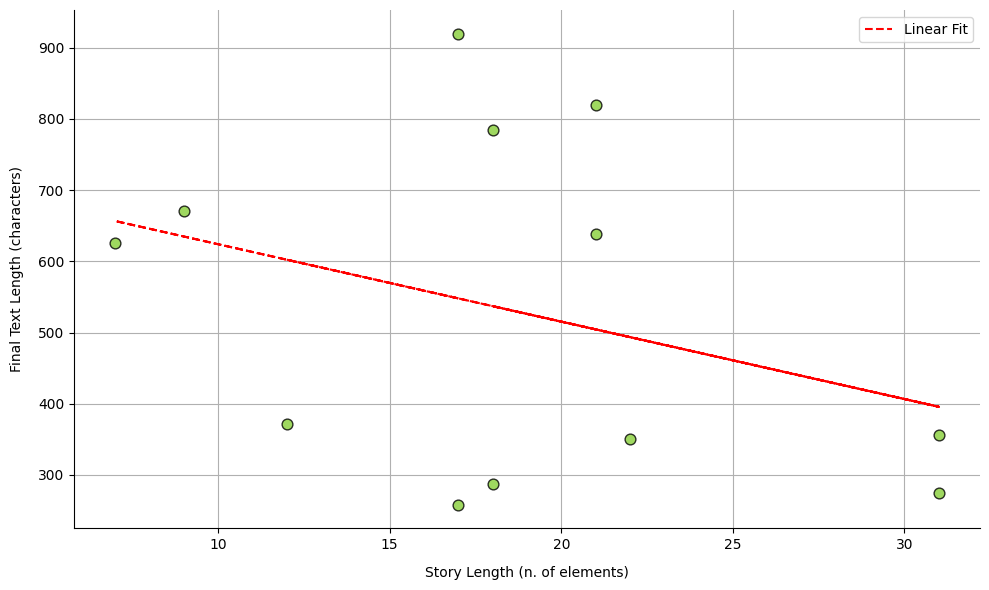

In [ ]:
file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)

story_lengths = []
final_text_lengths = []

for story_id, story_data in data.items():
    elements_order = story_data.get('elements_order', {})
    last_element_value = elements_order[str(len(elements_order))]

    # Check if the last element is "text"
    if last_element_value == "text":
        texts = story_data.get('texts', [])
        last_text = texts[-1]
        final_text_lengths.append(len(last_text))
        story_lengths.append(len(elements_order))
print(f'Number of stories with closing text: {len(final_text_lengths)}')

coeffs = np.polyfit(story_lengths, final_text_lengths, 1)  # Linear regression
trendline = np.polyval(coeffs, story_lengths)

plt.figure(figsize=(10, 6))
plt.scatter(story_lengths, final_text_lengths, 
            color=color_palette[4], edgecolor='black', s=60, alpha=0.8)
plt.plot(story_lengths, trendline, color="red", linestyle="--", label='Linear Fit')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Story Length (n. of elements)", labelpad=10)
plt.ylabel("Final Text Length (characters)", labelpad=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## SPARQL queries

In [116]:
file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)

data_sources_list = []

service_pattern = re.compile(r'SERVICE\s*<([^>]+)>', re.IGNORECASE)

for story_id, story_data in data.items():
    data_sources_list.append(story_data["sparql_endpoint"].split("//")[1])
    queries = story_data.get('queries', [])

    for query_dict in queries:
        query = re.sub(r'\s+', ' ', query_dict['query']).strip()
        service_matches = service_pattern.findall(query)
        for service_url in service_matches:
            if service_url:
                data_sources_list.append(service_url.split("//")[1])


data_sources_counts = Counter(data_sources_list)
data_sources_df = pd.DataFrame(data_sources_counts.items(), columns=["Source Type", "Count"])

print("\nSource Type Usage Frequency:")
print(data_sources_df)


Source Type Usage Frequency:
                                         Source Type  Count
0                          query.wikidata.org/sparql     42
1             polifonia.disi.unibo.it/musicbo/sparql      6
2    query.wikidata.org/bigdata/namespace/wdq/sparql     23
3                                 dbpedia.org/sparql      4
4                         dati.cultura.gov.it/sparql      1
5  triplestore.netwerkdigitaalerfgoed.nl/reposito...      1


In [ ]:
# Federated queries

file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)
    
# Regular expression to capture all federated endpoints in SERVICE clauses
service_pattern = re.compile(r'SERVICE\s*<([^>]+)>', re.IGNORECASE)

total_queries = 0
federated_queries = 0
federated_endpoints = []

for story_id, story_data in data.items():
    queries = story_data.get('queries', [])
    main_endpoint = story_data.get("sparql_endpoint", "")
    if main_endpoint:
        data_sources_list.append(main_endpoint.split("//")[1])  # Keep everything after the //

    for query_dict in queries:
        total_queries += 1  # Increment total query count
        query = query_dict.get('query', '')
        
        # Find all SERVICE matches (for federated queries)
        service_matches = service_pattern.findall(query)
        
        # If SERVICE matches are found, this is a federated query
        if service_matches:
            federated_queries += 1  # Increment federated query count
            federated_endpoints.extend([service_url.split("//")[1] for service_url in service_matches])  # Keep the part after //

# Calculate percentage of federated queries
if total_queries > 0:
    percentage_federated = (federated_queries / total_queries) * 100
else:
    percentage_federated = 0

# Print the summary
print(f"Total Queries: {total_queries}")
print(f"Federated Queries: {federated_queries}")
print(f"Percentage of Queries using Federated Endpoints: {percentage_federated:.2f}%")

# Analyze federated endpoint usage
federated_endpoints_counter = Counter(federated_endpoints)
federated_endpoints_df = pd.DataFrame(federated_endpoints_counter.items(), columns=["Federated Endpoint", "Count"])

print("\nFederated Endpoint Usage Frequency:")
print(federated_endpoints_df)

Total Queries: 464
Federated Queries: 26
Percentage of Queries using Federated Endpoints: 5.60%

Federated Endpoint Usage Frequency:
                                Federated Endpoint  Count
0  query.wikidata.org/bigdata/namespace/wdq/sparql     23
1                               dbpedia.org/sparql      2
2                       dati.cultura.gov.it/sparql      1


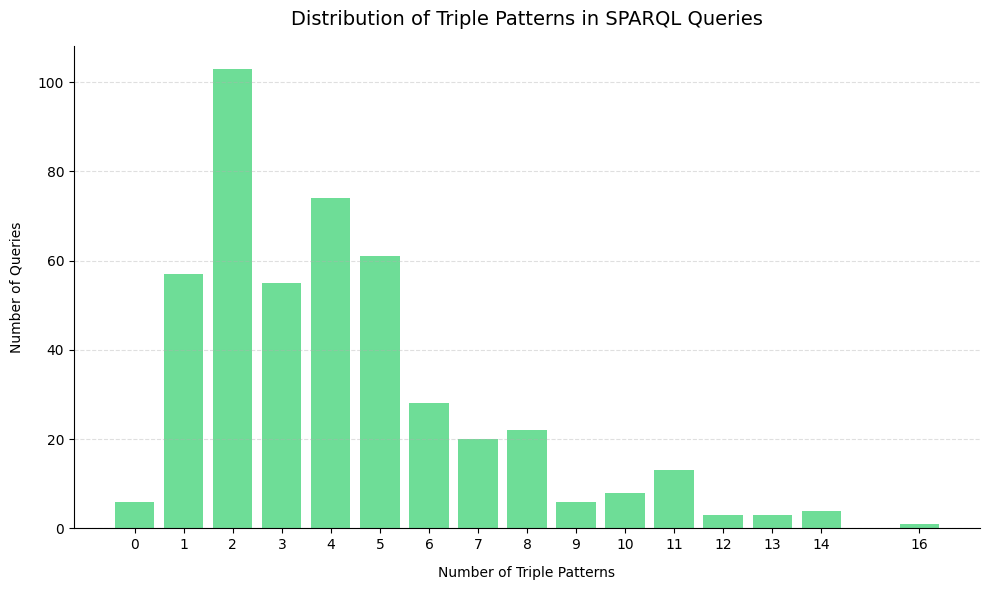

In [18]:
def extract_where_clause(query):
    start = query.find('WHERE')
    if start == -1:
        return None

    # Find the opening brace
    start = query.find('{', start)
    if start == -1:
        return None

    # Use a stack to find the matching closing brace
    stack = []
    for i in range(start, len(query)):
        if query[i] == '{':
            stack.append('{')
        elif query[i] == '}':
            stack.pop()
            if not stack:
                return query[start + 1:i]  # Return the content between the outermost braces

    return None  # In case the braces are unbalanced

def count_triple_patterns(query):
    where_clause = extract_where_clause(query)
    
    if where_clause:
        # Normalize the where_clause by removing unnecessary newlines and spaces
        where_clause = where_clause.replace('\r', '').replace('\n', ' ').strip()

        # Split triples by the main delimiters
        triple_groups = re.split(r'\.\s*', where_clause)
        triple_count = 0

        for group in triple_groups:
            group = group.strip()
            if not group:
                continue
            if 'OPTIONAL' in group or 'SERVICE' in group or 'FILTER' in group:
                # Skip counting these as they don't always represent triples
                if 'OPTIONAL' in group or 'SERVICE' in group:
                    inner_triples = re.findall(r'\{(.*?)\}', group, re.DOTALL)
                    for triple_block in inner_triples:
                        triple_count += count_triple_patterns(triple_block)
            else:
                # Count triples by semicolon and comma structure
                subject_predicate_pairs = group.split(';')
                for pair in subject_predicate_pairs:
                    objects = pair.split(',')
                    # Only count as a triple if it has a valid subject-predicate-object structure
                    if len(objects) > 0:
                        triple_count += len(objects)               
        return triple_count
    else:
        return 0

file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)

queries = []

for story_id, story_data in data.items():
    story_queries = story_data.get('queries', [])
    
    for query_dict in story_queries:
        query = query_dict.get('query', '')
        if query:
            query = re.sub(r'(^|\s)#.*?(\r\n|\n)', r'\1', query)
            query = re.sub(r'\s+', ' ', query).strip()
            queries.append(query)

triple_counts = [count_triple_patterns(query) for query in queries]
triple_pattern_counter = Counter(triple_counts)

num_triple_patterns = list(triple_pattern_counter.keys())
num_queries = list(triple_pattern_counter.values())

plt.figure(figsize=(10, 6))
plt.bar(num_triple_patterns, num_queries, color=color_palette[5], alpha=0.7)
plt.title('Distribution of Triple Patterns in SPARQL Queries',  fontsize=14, pad=15)
plt.xlabel('Number of Triple Patterns', labelpad=10)
plt.ylabel('Number of Queries', labelpad=10)
plt.xticks(ticks=num_triple_patterns)
plt.grid(axis='y', linestyle='--', alpha=0.4)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

plt.show()


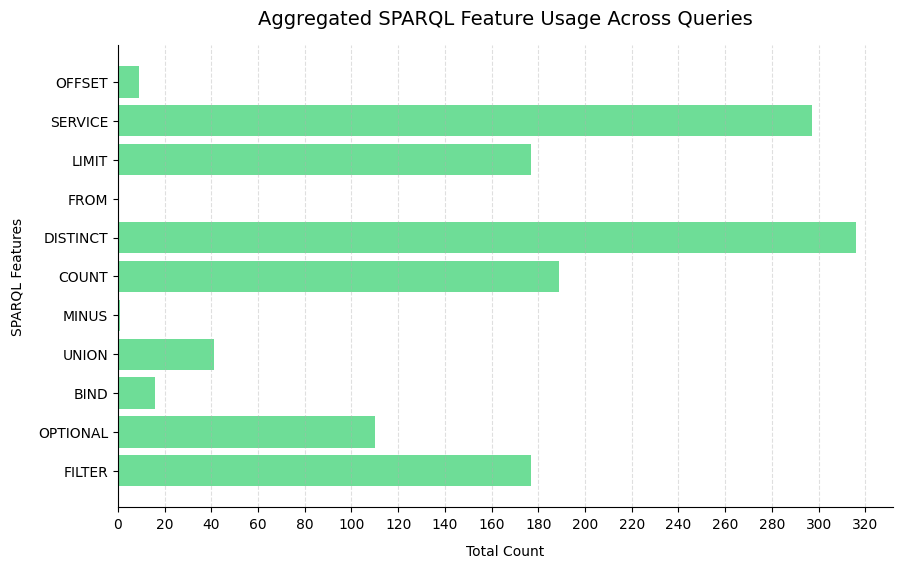

In [19]:
file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# List of SPARQL features to look for
sparql_features = ["FILTER", "OPTIONAL", "BIND", "UNION", "MINUS", "COUNT", "DISTINCT", "FROM", "LIMIT", "SERVICE", "OFFSET"]

def count_sparql_features(query, features):
    feature_counts = {feature: len(re.findall(r'\b' + feature + r'\b', query)) for feature in features}
    return feature_counts

# dictionary to accumulate counts for all queries
total_feature_counts = {feature: 0 for feature in sparql_features}

queries = []

for story_id, story_data in data.items():
    story_queries = story_data.get('queries', [])
    
    for query_dict in story_queries:
        query = query_dict.get('query', '')
        if query:
            queries.append(query)
            feature_counts = count_sparql_features(query, sparql_features)
            for feature, count in feature_counts.items():
                total_feature_counts[feature] += count


plt.figure(figsize=(10, 6))
plt.barh(list(total_feature_counts.keys()), list(total_feature_counts.values()), color=color_palette[5], alpha=0.7)
plt.title('Aggregated SPARQL Feature Usage Across Queries',  fontsize=14, pad=15)
plt.xlabel('Total Count', labelpad=10)
plt.ylabel('SPARQL Features', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.4)
max_val = max(total_feature_counts.values())
plt.xticks(np.arange(0, max_val + 20, 20))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

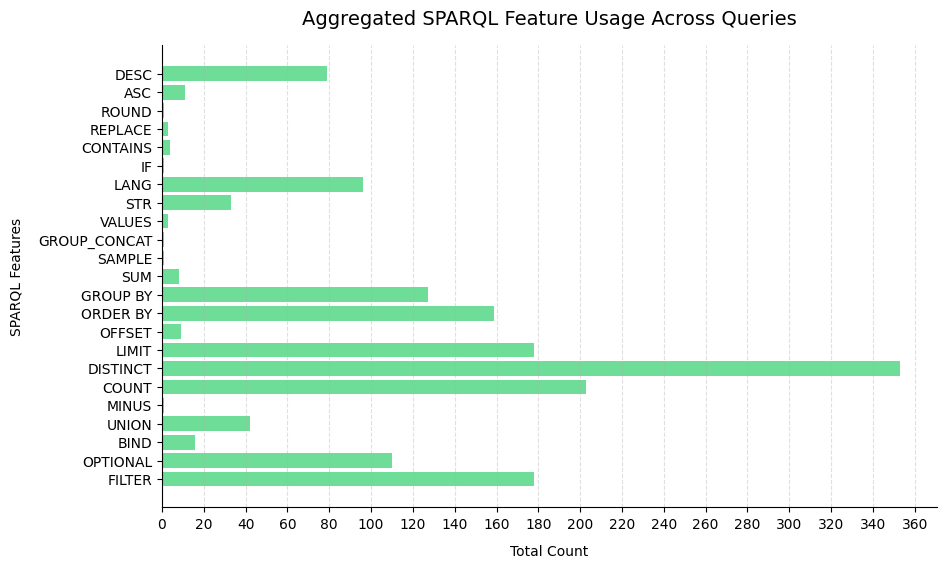

In [ ]:
file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# List of SPARQL features to look for
sparql_features = ["FILTER", "OPTIONAL", "BIND", "UNION", "MINUS", "COUNT", 
                   "DISTINCT", "LIMIT", "OFFSET", "ORDER BY", "GROUP BY", "SUM", "SAMPLE", 
                   "GROUP_CONCAT", "VALUES", "STR", "LANG", "IF", "CONTAINS", "REPLACE", "ROUND", "ASC", "DESC"]


def clean_query_text(query):
    # Remove comments
    query = re.sub(r'(^|\s)#.*?(\r\n|\n)', r'\1', query)
    # Normalize whitespace
    query = re.sub(r'\s+', ' ', query)
    # Remove variables like ?varName
    query = re.sub(r'\?[^\s\)\(]*', '', query)
    # Remove URIs like <http://example.org/prop>
    query = re.sub(r'<[^>]*>', '', query)
    return query.strip()

# Function to count features in a query
def count_sparql_features(query, features):
    query = clean_query_text(query)
    feature_counts = {
        feature: len(re.findall(r'\b' + re.escape(feature) + r'\b', query, re.IGNORECASE))
        for feature in features
    }
    return feature_counts

# Dictionary to accumulate feature counts across all queries
total_feature_counts = {feature: 0 for feature in sparql_features}

# To store detailed counts per story (optional, for further analysis)
story_feature_counts = {}

# Loop through each story and its queries
for story_id, story_data in data.items():
    story_queries = story_data.get('queries', [])
    story_counts = {feature: 0 for feature in sparql_features}
    
    for query_dict in story_queries:
        query = query_dict.get('query', '')
        if query:
            feature_counts = count_sparql_features(query, sparql_features)
            for feature, count in feature_counts.items():
                total_feature_counts[feature] += count
                story_counts[feature] += count
    
    # Save per-story counts
    story_feature_counts[story_id] = story_counts


plt.figure(figsize=(10, 6))
plt.barh(list(total_feature_counts.keys()), list(total_feature_counts.values()), color=color_palette[5], alpha=0.7)
plt.title('Aggregated SPARQL Feature Usage Across Queries',  fontsize=14, pad=15)
plt.xlabel('Total Count', labelpad=10)
plt.ylabel('SPARQL Features', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.4)
max_val = max(total_feature_counts.values())
plt.xticks(np.arange(0, max_val + 20, 20))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [94]:
def classify_element(element):
    element = element.strip()
    if element.startswith('?') or element.startswith('$'):
        return 'V'  # Variable
    elif element.startswith('<') and element.endswith('>'):
        return 'C'  # Constant URI
    elif ':' in element and not (element.startswith('"') or element.endswith('"')):
        return 'C'  # Prefixed name
    elif element.startswith('"') and element.endswith('"'):
        return 'C'  # Literal
    else:
        return 'C'

# Function to split the WHERE clause by periods, but only outside of curly braces
def split_outside_braces(where_clause):
    result = []
    buffer = []
    brace_depth = 0

    for char in where_clause:
        if char == '{':
            brace_depth += 1
        elif char == '}':
            brace_depth -= 1
        
        if char == '.' and brace_depth == 0:
            # We're at a period and not inside braces, so we split here
            result.append(''.join(buffer).strip())
            buffer = []
        else:
            # Keep building the current part of the clause
            buffer.append(char)
    
    # Append any remaining part after the last period
    if buffer:
        result.append(''.join(buffer).strip())
    
    return result

# Function to classify and extract triple patterns (updated to use the new splitting method)
def classify_triple_patterns(where_clause):
    # where_clause = extract_where_clause(query)  # Use the provided extract_where_clause function
    patterns = []

    if where_clause:
        # Split WHERE clause into triple groups using the custom function
        triple_groups = split_outside_braces(where_clause)
        
        for group in triple_groups:
            group = group.strip()
            if not group:
                continue
            if 'OPTIONAL' in group or 'SERVICE' in group:
                # Handle OPTIONAL and SERVICE clauses
                inner_triples = re.findall(r'\{(.*?)\}', group, re.DOTALL)
                for triple_block in inner_triples:
                    patterns.extend(classify_triple_patterns(triple_block))  # Recursively classify nested triples
            else:
                # Regex to capture subject-predicate-object triples
                triples = re.findall(
                    r'(\?[^\s]+|<[^>]+>|\"[^\"]+\"|[^\s]+:[^\s]+)\s+(\?[^\s]+|<[^>]+>|\"[^\"]+\"|[^\s]+:[^\s]+)\s+(\?[^\s]+|<[^>]+>|\"[^\"]+\"|[^\s]+:[^\s]+)',
                    group
                )
                for triple in triples:
                    subject, predicate, obj = triple
                    pattern = f"{classify_element(subject)}{classify_element(predicate)}{classify_element(obj)}"
                    patterns.append(pattern)

    return patterns

# Process all queries in the data
patterns_counter = Counter()
for query in queries:
    where_clause = extract_where_clause(query)  # Call extract_where_clause only once here
    if where_clause:

        patterns = classify_triple_patterns(where_clause)
        patterns_counter.update(patterns)

# Calculate the percentage for each pattern
total_triples = sum(patterns_counter.values())
pattern_percentages = {pattern: (count / total_triples) * 100 for pattern, count in patterns_counter.items()}

df = pd.DataFrame.from_dict(pattern_percentages, orient='index', columns=['Percentage'])
df.index.name = 'Pattern'
df = df.reset_index()
df['Percentage'] = df['Percentage'].apply(lambda x: f"{x:.2f}%")

print(df)

  Pattern Percentage
0     VVC      8.12%
1     VCC     23.37%
2     VCV     40.28%
3     CCC     15.81%
4     CCV     10.09%
5     CVC      1.48%
6     VVV      0.43%
7     CVV      0.43%
